<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework-Assignment-2:-Deep-Learning-Foundation" data-toc-modified-id="Homework-Assignment-2:-Deep-Learning-Foundation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework Assignment 2: Deep Learning Foundation</a></span><ul class="toc-item"><li><span><a href="#Obbjectives:" data-toc-modified-id="Obbjectives:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Obbjectives:</a></span></li><li><span><a href="#3.COVID-19 Real World Worry Dataset" data-toc-modified-id="COVID-19-Real-World-Worry-Dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>COVID-19 Real World Worry Dataset</a></span></li><li><span><a href="#4.Task 1: Prepare data" data-toc-modified-id="Task-1:-Prepare-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Task 1: Prepare data</a></span></li><li><span><a href="#Task-2:-Create-seqential-models-to-classify-short_text-into-worry_level-in-different-architectures" data-toc-modified-id="Task-2:-Create-seqential-models-to-classify-short_text-into-worry_level-in-different-architectures-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Task 2: Create seqential models to classify <code>short_text</code> into <code>worry_level</code> in different architectures</a></span></li><li><span><a href="#Task-2:-Fight-overfitting" data-toc-modified-id="Task-2:-Fight-overfitting-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Task 3: Fight overfitting</a></span></li><li><span><a href="#Task-3:-Create-neural-network-model-for-regression-task" data-toc-modified-id="Task-3:-Create-neural-network-model-for-regression-task-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Task 4: Create neural network model for regression task</a></span></li></ul></li></ul></div>

<a id="1.Summary"></a>
# 1.Summary

### Obbjectives:
- Practice creating sequential models with Keras for different tasks:
    - Classification
    - Regression
- Test different architectures: wide vs. deep, complex/simple models
- Learn how to use different techniques to fight with underfitting and overfitting

<br>

<a id="2.Table of Contents"></a>
# 2.Tabole of Contents
<a href="#1.Summary">Click this Link back to Top</a>

<ol>
    <li><a href="#1.Summary">Summary</a></li>
    <li><a href="#2.Tabole of Contents">Tabole of Contents</a></li>
    <li><a href="#3.COVID-19 Real World Worry Dataset">COVID-19 Real World Worry Dataset</a></li>
    <li><a href="#4.Task 1: Prepare data">Task 1: Prepare data</a></li>
    <ul>
       <li><a href="#4.1 TF-IDF">4.1 TF-IDF</a></li>
    </ul>
    <li><a href="#5.Task 2: Build Neural Network">Task 2: Build Neural Network</a></li>
    <ul>
       <li><a href="#5.1 Model_A">5.1 Model_A</a></li>
       <li><a href="#5.2 Model_B">5.2 Model_B</a></li> 
       <li><a href="#5.3 Model_C">5.3 Model_C</a></li>
       <li><a href="#5.4 Split and Fit">5.4 Split and Fit</a></li>
       <li><a href="#5.5 Main_Function">5.5 Main_Function</a></li> 
       <li><a href="#5.6 Plot and Analysis">5.6 Plot and Analysis</a></li> 
    </ul>
    <li><a href="#6.Task 3: Fight overfitting">Task 3: Fight overfitting</a></li>
    <ul>
       <li><a href="#6.1 Model B1 (Dropout)">6.1 Model B1 (Dropout)</a></li>
       <li><a href="#6.2 Model B2 (L2)">6.2 Model B2 (L2)</a></li> 
       <li><a href="#6.3 Model B3 (Dropout+L2)">6.3 Model B3 (Dropout+L2)</a></li>
       <li><a href="#6.4 Fit">6.4 Fit</a></li> 
       <li><a href="#6.5 Plot and Analysis">6.5 Plot and Analysis</a></li> 
    </ul>
    <li><a href="#7.Task 4: NN for regression task">Task 4: NN for regression task</a></li>
    <li><a href="#8.Task 5: NN for multi-classification task">Task 5: NN for multi-classification task</a></li>
    <li><a href="#9.Hyperparameter Explain">Hyperparameter Explain</a></li>
    <li><a href="#10.Unused Code">Unused Code</a></li>
</ol>

<br>

<a id="3.COVID-19 Real World Worry Dataset"></a>
# 3.COVID-19 Real World Worry Dataset
<a href="#1.Summary">Click this Link back to Top</a>

- In this assignment, we will build a network to predict the levels of worry people feel about Covid-19. 
- The dataset contains a column "worry", which gives the level of worry each participant in this study reported. Let's create a `binary` variable called "worry_level", which is set to 1 (i.e. high) if `worry>5`, otherwise, 0 (i.e. low)
- The dataset also contains two textual columns: `text_short` and `text_long`, which describes how each participant feels about the pandemic. For this assignment, we'll only use `text_short` column to predict the level of worry.
- The details of the dataset can be found at https://arxiv.org/abs/2004.04225. 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from IPython.display import Image
def read_df():
    """
    """
    df = pd.read_csv("03_data/28_RWWD.csv")
    # create a new column, transform worry level from 1-10 to binary(0 is low, 1 is high)
    df["worry_level"] = df.worry.apply(lambda x: 1 if x>5 else 0)
    #display(df.head(3))
    return df

<br>

<br>

<br>

<a id="4.Task 1: Prepare data"></a>
# 4.Task 1: Prepare data
<a href="#1.Summary">Click this Link back to Top</a>

- You'll need to vectorize `text_short` column using a classical approach called `TF-IDF (Term Frequency and Inverse Document Frequency)`. You'll use the word vector approach in your next assignment. 
- If you're not familiar with `TF-IDF`, please check this tutorial: https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a. 
- Sklearn package contains a function called `TfidfVectorizer` to vectorize documents. You do not have to remove stop words or lemmatize words in this exercise.
- After vectorization, you'll get an array, where each document in `text_short` column is represented as a row and each word is a column. If a word (say $j$) appears in the document (say $i$), the value at $(i, j)$ is the `TF-IDF` weight of the word in the document.
- Be sure to save the result of vectorization as a `dense array, not a sparse array`. When fitting Keras model, dense arrays are expected

<a id="4.1 TF-IDF"></a>
# 4.1 TF-IDF
<a href="#1.Summary">Click this Link back to Top</a>

In [2]:
# Write script to vectorize text_short column
# Suggest to use Sklearn package
# You need to save the vectorization result as a dense array
# Pay attention to the shape of the array
from sklearn.feature_extraction.text import TfidfVectorizer
def tf_idf(df, col='text_short'):
    """
    Argus:
    ------
    df:DataFrame
        from read_df() function
        
    col:string
        provide the column that we want to convert, default value is "text_short"
    
    Returns:
    -------
    df_array:DataFrame
        
    """
    # vectorize text from data column by invidual word and remove stop_words
    tfidf_vec = TfidfVectorizer(analyzer='word',stop_words= 'english')
    # fit the data string with vectorization
    tfidf_matrix = tfidf_vec.fit_transform(df[col])
    # get the words name from tfidf
    tfidf_tokens = tfidf_vec.get_feature_names()
    # transfor vector type (scipy.sparse.csr.csr_matrix) to np.ndarray
    df_array =tfidf_matrix.toarray() 
    # add each word columns to form dataframe, which means we can see each word tf-idf through boolean extraction
    df_tfidf_vect = pd.DataFrame(data = tfidf_matrix.toarray(),columns = tfidf_tokens)
    # add one sentence corpus into one single DataFrame cell
    df_tfidf_vect['sentence_array'] = list(df_array)
    
    return tfidf_tokens, df_tfidf_vect

In [3]:
"""
#tokens, df_4= tf_idf(df)
# df_4.iloc[0,-1].sum()
df_4.columns
# **************tf-idf extraction****************
# extract first row of df_tfidf_vect,last colunm is sentence_arrary, not include
df_5 = pd.DataFrame(df_4.iloc[0,:-1])
# use boolean to match out the tokens coorresponding tf-idf value
df_5[df_4.iloc[0,:-1]>0]
# **************tf-idf extraction**************
"""

'\n#tokens, df_4= tf_idf(df)\n# df_4.iloc[0,-1].sum()\ndf_4.columns\n# **************tf-idf extraction****************\n# extract first row of df_tfidf_vect,last colunm is sentence_arrary, not include\ndf_5 = pd.DataFrame(df_4.iloc[0,:-1])\n# use boolean to match out the tokens coorresponding tf-idf value\ndf_5[df_4.iloc[0,:-1]>0]\n# **************tf-idf extraction**************\n'

<br>

<br>

<br>

<a id="5.Task 2: Build Neural Network"></a>
# 5.Task 2: Build Neural Network
<a href="#1.Summary">Click this Link back to Top</a>

### Task 2: Create seqential models to classify `short_text` into `worry_level` in different architectures
- After vectorization, create a neural network model which takes the vectors of `short_text` as an input and predicts the binary `worry_level`.
- Create three different sequential models as shown in the figure below.
    1. Model A: This model only has one hidden layer with 256 units
    2. Model B: This model only has one hidden layer with 128 units
    3. Model C: This model has two hidden layers. The first hidden layer has 128 units and the second hidden layer has 32 units.
- Be sure to set the right `input shape` for the first layer, and the right `activation functions` for the hidden layers and the output layer.
- Set aside 20% of them as the test subset (i.e. `x_test, y_test`). From the remaining samples, set aside 20% of the samples for validation (i.e. `x_val, y_val`)
- Define a function `fit_model(model, x_train, y_train, x_val, y_val, x_test, y_test)`, and use this function to train each `model` as follows:
    - Train with appropriate hyperparameters, including `optimizer`, `loss function`, `epochs`, and `batch_size`
    - After training, calculate the loss and accuracy of each model on the test dataset (i.e. `x_test, y_test`) and print them out
    - Return training history  
- Plot validation loss and validation accuracy vs. epoches from the training histories of these three models
- Write your analysis (as markdowns) on the following: 
   - For each model, from which epoch, overfitting started happening?
   - Which model in general performs the best in terms of valiation loss or validation accuracy? 
   - Please explain why this model outperforms the others

In [4]:
# fix random number so model results can be replicated

from numpy.random import seed
#from tensorflow.random import set_seed # tf version = 1.15.0

seed(123)
tf.random.set_seed(123) #tf.version=2.1.0

In [5]:
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras import models
# every Dense, Input layers should use layers.Input format
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras import Model
from tensorflow.keras import regularizers

<br>

<a id="5.1 Model_A"></a>
# 5.1 Model_A
<a href="#1.Summary">Click this Link back to Top</a>

In [6]:
# Define model A

# add your code here
def model_A(data):
    """
    Argus:
    ------
    data:pandas.Serise
        Import will be a panda.Serise with index and column name
    
    Return:
    ------
    model:
    
    """
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    # row = number of examples
    # column = number of vector dimension (For TF-IDF algorithm, number of unique words is the word_dimension) 
    DIM = data.shape[1]
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    
    # clean model data
    model=None
    # input is not Dense layer, only a straight layer
    input_1 = layers.Input(shape=(DIM,), name="input_layer")
    # only one layer hidden Dense layers with 256 units, which means output will be 256 dimension
    # paramter between input_1 and dense_2 will be (4148+1)*256 = 1062144. Plus 1 is bias term
    dense_2 = layers.Dense(256, activation='relu',name="dense_layer")(input_1)
    # 
    dense_3 = layers.Dense(1,activation='sigmoid', name='output_layer')(dense_2)
    model = Model(inputs=input_1, outputs=dense_3)
    model.summary()
    # Display model graph - optional
    G = model_to_dot (model)
    Image(G.create (prog = "dot", format = "png"))
    #
#     display(plot_model(model, show_shapes=True, dpi=128))
    
    return model

In [7]:
# model_a = model_A(X_train)

<br>

<br>

<br>

<a id="5.2 Model_B"></a>
# 5.2 Model_B
<a href="#1.Summary">Click this Link back to Top</a>

In [8]:
# Define Model B

# add your code here
def model_B(data):
    """
    One hidden layer with 128 units
    Argus:
    ------
    data:pandas.Serise
        Import will be a panda.Serise with index and column name
    
    Return:
    ------
    model:
    
    """
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    # row = number of examples
    # column = number of vector dimension (For TF-IDF algorithm, number of unique words is the word_dimension) 
    DIM = data.shape[1]
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    
    # clean model data
    model=None
    # input is not Dense layer, only a straight layer
    input_1 = layers.Input(shape=(DIM,), name="input_layer")
    # only one layer hidden Dense layers with 256 units, which means output will be 256 dimension
    # paramter between input_1 and dense_2 will be (4148+1)*256 = 1062144. Plus 1 is bias term
    dense_2 = layers.Dense(128, activation='relu',name="dense_layer")(input_1)
    # 
    dense_3 = layers.Dense(1,activation='sigmoid', name='output_layer')(dense_2)
    model = Model(inputs=input_1, outputs=dense_3)
    model.summary()
    # Display model graph - optional
    G = model_to_dot (model)
    Image(G.create (prog = "dot", format = "png"))
    #
    display(plot_model(model, show_shapes=True, dpi=128))
    
    return model

<br>

<br>

<a id="5.3 Model_C"></a>
## 5.3 Model_C
<a href="#1.Summary">Click this Link back to Top</a>

In [9]:
# Define Model C

# add your code here
def model_C(data):
    """
    Two hidden layer, frist is 128 units, second is 32 units
    
    Argus:
    ------
    data:pandas.Serise
        Import will be a panda.Serise with index and column name
    
    Return:
    ------
    model:
    
    """
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    # row = number of examples
    # column = number of vector dimension (For TF-IDF algorithm, number of unique words is the word_dimension) 
    DIM = data.shape[1]
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    
    # clean model data
    model=None
    # input is not Dense layer, only a straight layer
    input_1 = layers.Input(shape=(DIM,), name="input_layer")
    # only one layer hidden Dense layers with 256 units, which means output will be 256 dimension
    # paramter between input_1 and dense_2 will be (4148+1)*256 = 1062144. Plus 1 is bias term
    dense_2 = layers.Dense(128, activation='relu',name="first_hidden_layer")(input_1)
    # 
    dense_3 = layers.Dense(32, activation='relu', name='second_hidden_layer')(dense_2)
    dense_4 = layers.Dense(1, activation='sigmoid', name='output_layer')(dense_3)
    model = Model(inputs=input_1, outputs=dense_4)
    model.summary()
    # Display model graph - optional
    G = model_to_dot (model)
    Image(G.create (prog = "dot", format = "png"))
    #
    display(plot_model(model, show_shapes=True, dpi=128))
    
    return model

<br>

<a id="5.4 Split and Fit"></a>
## 5.4 Split and Fit
<a href="#1.Summary">Click this Link back to Top</a>

In [10]:
# Split training dataset into train, test and validation subsets

from sklearn.model_selection import train_test_split

# add your code here
def split(df_data, df_tfidf_vect):
    """
    The easiest way is split twice and get train/validation/test dataset
    """
    # First, split 80% train and 20% test
    # input data should be a m*n matrix, m is the number of example, n is the number of word dimension
    X_train, X_test, y_train, y_test = train_test_split(df_tfidf_vect.iloc[:,:-1], \
                                                         df_data['worry_level'], test_size=0.2, random_state=42)
    # Second, split 80% train and 20% validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [11]:
# X_train, X_val, X_test, y_train, y_val, y_test = split_1(df_data, df_tfidf_vect)

In [12]:
# Define fit_model function
def fit_model(model, X_train, y_train, X_val, y_val, X_test, y_test, epo=10, loss_fun="binary_crossentropy", met=['accuracy']):
    """
    Argus:
    ------
    
    loss_fun:string
        default "binary_crossentropy" used for classify. "mse" or "mae" for linear regresion
        
    met:list
        parameter for metrices im model.compile()
    
    Returns:
    --------
    """    
    history = None
    
    # add your code here
    # please print out the performance on test subset
    # loss_function will be binary_crossentropy for sigmoid binary classifier problem
    # default learning rate optimzer is "RMSprop" is better
    # metrics have another options "BinaryAccuracy"
    model.compile(loss=loss_fun, \
              optimizer="RMSprop", \
              metrics=met)
    
    # history contain a dictionary ['loss', 'accuracy', 'val_loss', 'val_accuracy']
    history = model.fit(X_train,
                    y_train,
                    epochs=epo,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    verbose=1)
    # results.loss and results.accuracy
    # because X_test only have 499 example, so we reduce batch_size from 128 to 32
    results = model.evaluate(X_test,  y_test, batch_size=32, verbose=1)
    # get the dictionary of history
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    return history, results, acc, val_acc, loss, val_loss

In [13]:
# Use exponential decay to smooth performance curve (optional)
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

<br>

<a id="5.5 Main_Function"></a>
## 5.5 Main_Function
<a href="#1.Summary">Click this Link back to Top</a>

In [14]:
if __name__=="__main__":
    # get csv data, df_data is the integrity dataset
    df_data = read_df()
    # convert short_question into tf-idf version, firt 4148 column is 
    tfidf_tokens, df_tfidf_vect = tf_idf(df_data, col='text_short')
    # split data into three part
    X_train, X_val, X_test, y_train, y_val, y_test = split(df_data, df_tfidf_vect)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 4148)]            0         
_________________________________________________________________
dense_layer (Dense)          (None, 256)               1062144   
_________________________________________________________________
output_layer (Dense)         (None, 1)                 257       
Total params: 1,062,401
Trainable params: 1,062,401
Non-trainable params: 0
_________________________________________________________________


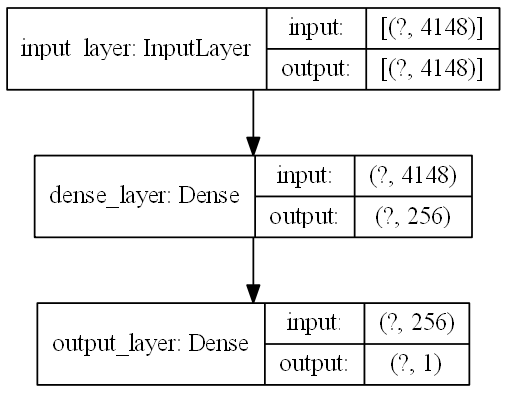

Train on 1593 samples, validate on 399 samples
Epoch 1/100
1593/1593 [==============================] - 2s 942us/sample - loss: 0.6173 - accuracy: 0.7690 - val_loss: 0.5333 - val_accuracy: 0.8170
Epoch 2/100
1593/1593 [==============================] - 0s 116us/sample - loss: 0.5186 - accuracy: 0.7753 - val_loss: 0.4835 - val_accuracy: 0.8170
Epoch 3/100
1593/1593 [==============================] - 0s 103us/sample - loss: 0.4729 - accuracy: 0.7753 - val_loss: 0.4671 - val_accuracy: 0.8170
Epoch 4/100
1593/1593 [==============================] - 0s 102us/sample - loss: 0.4396 - accuracy: 0.7759 - val_loss: 0.4599 - val_accuracy: 0.8170
Epoch 5/100
1593/1593 [==============================] - 0s 96us/sample - loss: 0.4056 - accuracy: 0.7859 - val_loss: 0.4649 - val_accuracy: 0.8170
Epoch 6/100
1593/1593 [==============================] - 0s 105us/sample - loss: 0.3719 - accuracy: 0.8223 - val_loss: 0.4591 - val_accuracy: 0.8195
Epoch 7/100
1593/1593 [==============================] - 0s 

In [15]:
# Fit model A
model_a = model_A(X_train)
# fit model_a
history_a, results_a, acc_a, val_acc_a, loss_a, val_loss_a = fit_model(model_a, X_train, y_train, X_val, y_val, X_test, y_test, epo=100)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 4148)]            0         
_________________________________________________________________
dense_layer (Dense)          (None, 128)               531072    
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 531,201
Trainable params: 531,201
Non-trainable params: 0
_________________________________________________________________


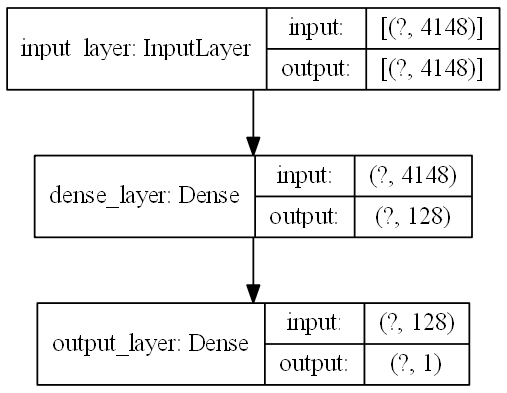

Train on 1593 samples, validate on 399 samples
Epoch 1/100
1593/1593 [==============================] - 1s 483us/sample - loss: 0.6401 - accuracy: 0.7602 - val_loss: 0.5753 - val_accuracy: 0.8170
Epoch 2/100
1593/1593 [==============================] - 0s 100us/sample - loss: 0.5567 - accuracy: 0.7753 - val_loss: 0.5177 - val_accuracy: 0.8170
Epoch 3/100
1593/1593 [==============================] - 0s 86us/sample - loss: 0.5070 - accuracy: 0.7753 - val_loss: 0.4860 - val_accuracy: 0.8170
Epoch 4/100
1593/1593 [==============================] - 0s 85us/sample - loss: 0.4746 - accuracy: 0.7753 - val_loss: 0.4690 - val_accuracy: 0.8170
Epoch 5/100
1593/1593 [==============================] - 0s 83us/sample - loss: 0.4500 - accuracy: 0.7753 - val_loss: 0.4669 - val_accuracy: 0.8170
Epoch 6/100
1593/1593 [==============================] - 0s 85us/sample - loss: 0.4262 - accuracy: 0.7803 - val_loss: 0.4613 - val_accuracy: 0.8170
Epoch 7/100
1593/1593 [==============================] - 0s 81u

In [16]:
# Fit Model B
# Fit model b
model_b = model_B(X_train)
# fit model_b
history_b, results_b, acc_b, val_acc_b, loss_b, val_loss_b = fit_model(model_b, X_train, y_train, X_val, y_val, X_test, y_test, epo=100)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 4148)]            0         
_________________________________________________________________
first_hidden_layer (Dense)   (None, 128)               531072    
_________________________________________________________________
second_hidden_layer (Dense)  (None, 32)                4128      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 535,233
Trainable params: 535,233
Non-trainable params: 0
_________________________________________________________________


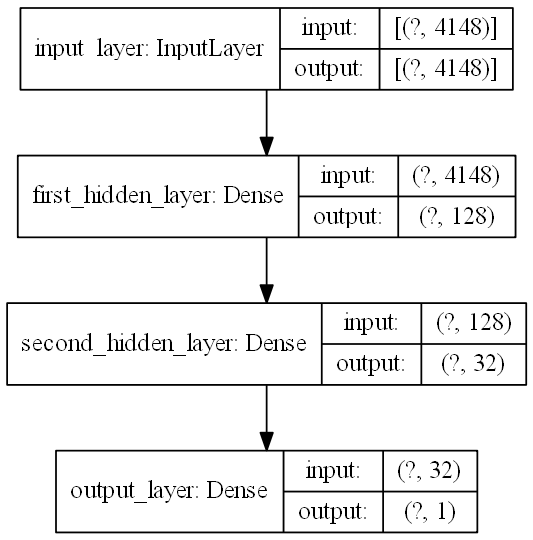

Train on 1593 samples, validate on 399 samples
Epoch 1/100
1593/1593 [==============================] - 1s 521us/sample - loss: 0.6229 - accuracy: 0.7470 - val_loss: 0.5245 - val_accuracy: 0.8170
Epoch 2/100
1593/1593 [==============================] - 0s 97us/sample - loss: 0.5127 - accuracy: 0.7753 - val_loss: 0.4718 - val_accuracy: 0.8170
Epoch 3/100
1593/1593 [==============================] - 0s 96us/sample - loss: 0.4654 - accuracy: 0.7753 - val_loss: 0.4625 - val_accuracy: 0.8170
Epoch 4/100
1593/1593 [==============================] - 0s 93us/sample - loss: 0.4196 - accuracy: 0.7778 - val_loss: 0.4568 - val_accuracy: 0.8170
Epoch 5/100
1593/1593 [==============================] - 0s 93us/sample - loss: 0.3640 - accuracy: 0.8167 - val_loss: 0.4693 - val_accuracy: 0.8120
Epoch 6/100
1593/1593 [==============================] - 0s 92us/sample - loss: 0.3117 - accuracy: 0.8814 - val_loss: 0.4674 - val_accuracy: 0.8070
Epoch 7/100
1593/1593 [==============================] - 0s 94us

In [17]:
# Fit model C
model_c = model_C(X_train)
# fit model_C
history_c, results_c, acc_c, val_acc_c, loss_c, val_loss_c= fit_model(model_c, X_train, y_train, X_val, y_val, X_test, y_test, epo=100)

<br>

<a id="5.6 Plot and Analysis"></a>
## 5.6 Plot and Analysis
<a href="#1.Summary">Click this Link back to Top</a>

<font size='5' color='red'>
<ol>
    <li>For almost all models, the overfitting occur at ecpoch 10 around</li>
     To decrease overfitting, we should choose model as simple as possible. Complex model will increase the traing set overfitting. So, in Task 1, Model_B is the best choose, because B has lowest loss result and relative higher validation accuracy. Model B is also the simplest model in three models.
</ol>    
</font>

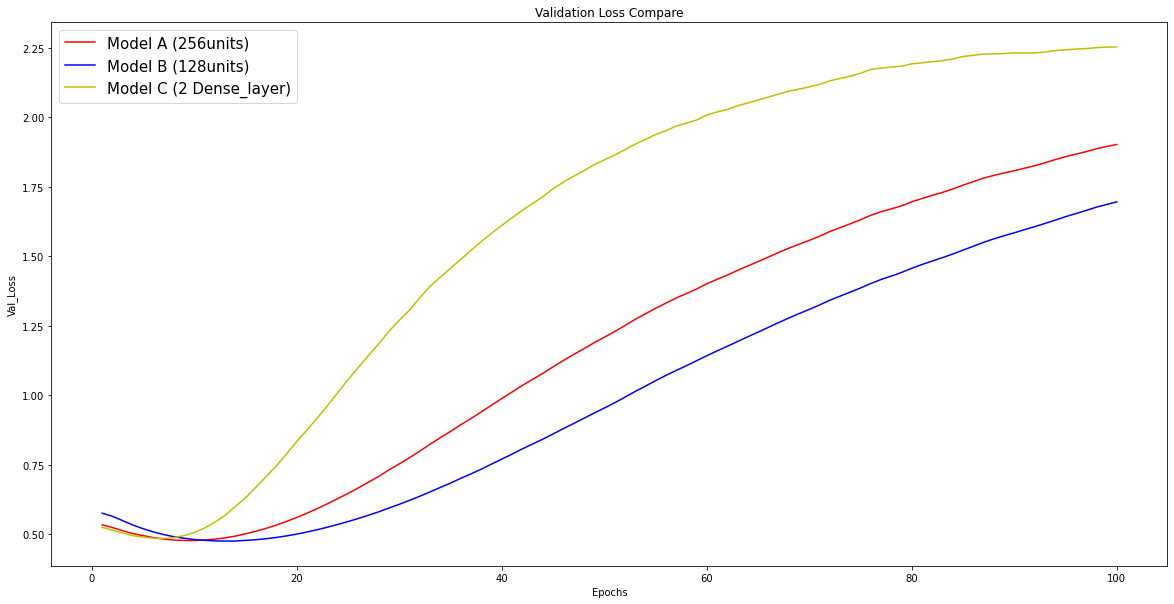

In [18]:
epochs = np.arange(1,101)
# plt.plot(epochs, val_loss_smooth)
fig, ax = plt.subplots(figsize=(20,10))  # Create a figure and an axes.
ax.plot(epochs, smooth_curve(val_loss_a), label='Model A (256units)', color='r')  # Plot some data on the axes.
ax.plot(epochs, smooth_curve(val_loss_b), label='Model B (128units)', color='b')  # Plot more data on the axes...
ax.plot(epochs, smooth_curve(val_loss_c), label='Model C (2 Dense_layer)', color='y')  # ... and some more.
ax.set_xlabel('Epochs')  # Add an x-label to the axes.
ax.set_ylabel('Val_Loss')  # Add a y-label to the axes.
ax.set_title("Validation Loss Compare")  # Add a title to the axes.
ax.legend(prop={'size': 15})  # Add a legend.

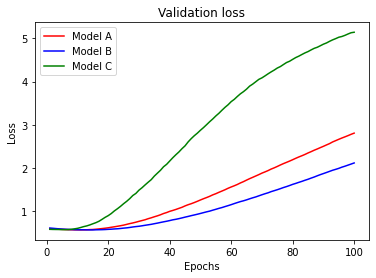

In [19]:
Image(filename='04_images/26.png') 

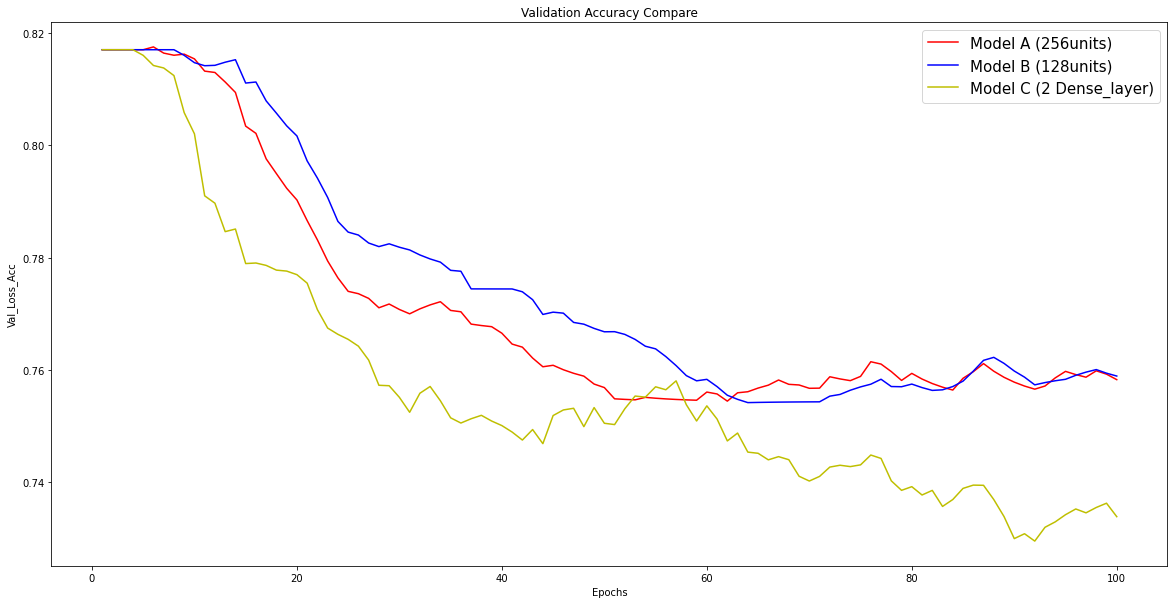

In [20]:
epochs = np.arange(1,101)
# plt.plot(epochs, val_loss_smooth)
fig, ax = plt.subplots(figsize=(20,10))  # Create a figure and an axes.
ax.plot(epochs, smooth_curve(val_acc_a), label='Model A (256units)', color='r')  # Plot some data on the axes.
ax.plot(epochs, smooth_curve(val_acc_b), label='Model B (128units)', color='b') # Plot more data on the axes...
ax.plot(epochs, smooth_curve(val_acc_c), label='Model C (2 Dense_layer)', color='y')# ... and some more.
ax.set_xlabel('Epochs')  # Add an x-label to the axes.
ax.set_ylabel('Val_Loss_Acc')  # Add a y-label to the axes.
ax.set_title("Validation Accuracy Compare")  # Add a title to the axes.
ax.legend(prop={'size':15})  # Add a legend.

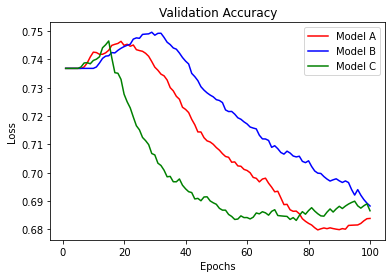

In [21]:
Image(filename='04_images/27.png') 

<br>

<a id="6.Task 3: Fight overfitting"></a>
# 6.Task 3: Fight overfitting
<a href="#1.Summary">Click this Link back to Top</a>

### Task 3: Fight overfitting 
- Let's take **Model B** and try the following strategies to overcome overfitting
    1. Model B1 (**Dropout**): Add a `Dropout` layer with dropout rate 0.5 to `after the input` (i.e. randomly drop 50% of the input; place it `before the the hidden layer`). Then add another `Dropout` layer with dropout rate 0.5 `after the hidden layer`
    2. Model B2 (**L2 Regularizer**): Add L2 kernel regularization with a coefficient of 0.001 in the hidden layer.
- Train each model as in Task 2 
- Plot validation loss and validation accuracy vs. epoches from the training histories of these <font color=red>three</font> models: B, B1, B2
- Write your analysis (as markdowns) on the following: 
   - Did any of the strategies improve model performance on the test dataset?
   - For each regularized model, did you still observe overfitting? In this case, which strategy is the most effective in reducing overfitting?
- `Note, due to randomness, you may observe slightly different results in each round. You just need to analyze based on one round of training results you obtained`.

<a id="6.1 Model B1 (Dropout)"></a>
## 6.1 Model B1 (Dropout)
<a href="#1.Summary">Click this Link back to Top</a>

In [22]:
# Define Model B1

# add your code here
# Define Model B

# add your code here
def model_B1(data):
    """
    One hidden layer with 128 units
    Argus:
    ------
    data:pandas.Serise
        Import will be a panda.Serise with index and column name
    
    Return:
    ------
    model:
    
    """
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    # row = number of examples
    # column = number of vector dimension (For TF-IDF algorithm, number of unique words is the word_dimension) 
    DIM = data.shape[1]
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    
    # clean model data
    model=None
    # input is not Dense layer, only a straight layer
    input_1 = layers.Input(shape=(DIM,), name="input_layer")
    # add Dropout layer between input and hidden layer
    dropout_2 = layers.Dropout(rate = 0.5, name='dropout_layer_2')(input_1)
    # only one layer hidden Dense layers with 256 units, which means output will be 256 dimension
    # paramter between input_1 and dense_2 will be (4148+1)*256 = 1062144. Plus 1 is bias term
    dense_3 = layers.Dense(128, activation='relu',name="dense_layer")(dropout_2)
    # add dropout layer
    dropout_4 = layers.Dropout(rate = 0.5,name="dropout_layer_4")(dense_3)
    # 
    dense_5 = layers.Dense(1,activation='sigmoid', name='output_layer')(dropout_4)
    model = Model(inputs=input_1, outputs=dense_5)
    model.summary()
    # Display model graph - optional
    G = model_to_dot (model)
    Image(G.create (prog = "dot", format = "png"))
    #
    display(plot_model(model, show_shapes=True, dpi=128))
    
    return model

In [23]:
#model_7 = model_B1(X_train)

<br>

<a id="6.2 Model B2 (L2)"></a>
## 6.2 Model B2 (L2)
<a href="#1.Summary">Click this Link back to Top</a>

In [24]:
# Define Model B2

# add your code here
# Define Model B

# add your code here
def model_B2(data):
    """
    One hidden layer with 128 units and l2(0.001) regularization
    
    Argus:
    ------
    data:pandas.Serise
        Import will be a panda.Serise with index and column name
    
    Return:
    ------
    model:
    
    """
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    # row = number of examples
    # column = number of vector dimension (For TF-IDF algorithm, number of unique words is the word_dimension) 
    DIM = data.shape[1]
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    
    # clean model data
    model=None
    # input is not Dense layer, only a straight layer
    input_1 = layers.Input(shape=(DIM,), name="input_layer")
    # only one layer hidden Dense layers with 256 units, which means output will be 256 dimension
    # paramter between input_1 and dense_2 will be (4148+1)*256 = 1062144. Plus 1 is bias term
    # add l2 and change activation from relu to elu
    dense_2 = layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),activation='elu',name="dense_layer")(input_1)
    # 
    dense_3 = layers.Dense(1,activation='sigmoid', name='output_layer')(dense_2)
    model = Model(inputs=input_1, outputs=dense_3)
    model.summary()
    # Display model graph - optional
    G = model_to_dot (model)
    Image(G.create (prog = "dot", format = "png"))
    #
    display(plot_model(model, show_shapes=True, dpi=128))
    
    return model

<br>

<a id="6.3 Model B3 (Dropout+L2)"></a>
## 6.3 Model B3 (Dropout+L2)
<a href="#1.Summary">Click this Link back to Top</a>

In [25]:
def model_B3(data):
    """
    Hidden layer(128units)+dropout(0.5)+l2(0.001)
    To fight overfitting, we need use all methods
    
    Argus:
    ------
    data:pandas.Serise
        Import will be a panda.Serise with index and column name
    
    Return:
    ------
    model:
    
    """
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    # row = number of examples
    # column = number of vector dimension (For TF-IDF algorithm, number of unique words is the word_dimension) 
    DIM = data.shape[1]
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    
    # clean model data
    model=None
    # input is not Dense layer, only a straight layer
    input_1 = layers.Input(shape=(DIM,), name="input_layer")
    # add Dropout layer between input and hidden layer
    dropout_2 = layers.Dropout(rate = 0.5, name='dropout_layer_2')(input_1)
    # only one layer hidden Dense layers with 256 units, which means output will be 256 dimension
    # paramter between input_1 and dense_2 will be (4148+1)*256 = 1062144. Plus 1 is bias term
    dense_3 = layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),activation='elu',name="dense_layer")(dropout_2)
    # add dropout layer
    dropout_4 = layers.Dropout(rate = 0.5,name="dropout_layer_4")(dense_3)
    # 
    dense_5 = layers.Dense(1,activation='sigmoid', name='output_layer')(dropout_4)
    model = Model(inputs=input_1, outputs=dense_5)
    model.summary()
    # Display model graph - optional
    G = model_to_dot (model)
    Image(G.create (prog = "dot", format = "png"))
    #
    display(plot_model(model, show_shapes=True, dpi=128))
    
    return model

<br>

<a id="6.4 Fit"></a>
## 6.4 Fit
<a href="#1.Summary">Click this Link back to Top</a>

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 4148)]            0         
_________________________________________________________________
dropout_layer_2 (Dropout)    (None, 4148)              0         
_________________________________________________________________
dense_layer (Dense)          (None, 128)               531072    
_________________________________________________________________
dropout_layer_4 (Dropout)    (None, 128)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 531,201
Trainable params: 531,201
Non-trainable params: 0
_________________________________________________________________


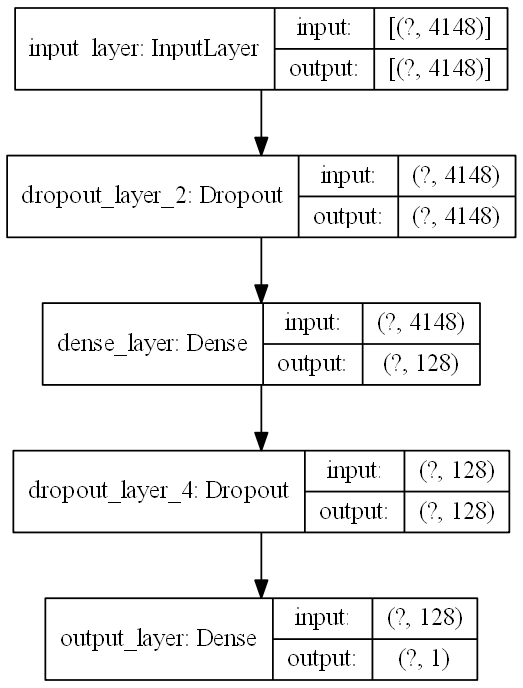

Train on 1593 samples, validate on 399 samples
Epoch 1/100
1593/1593 [==============================] - 1s 498us/sample - loss: 0.6468 - accuracy: 0.7527 - val_loss: 0.5955 - val_accuracy: 0.8170
Epoch 2/100
1593/1593 [==============================] - 0s 101us/sample - loss: 0.5861 - accuracy: 0.7753 - val_loss: 0.5388 - val_accuracy: 0.8170
Epoch 3/100
1593/1593 [==============================] - 0s 100us/sample - loss: 0.5458 - accuracy: 0.7753 - val_loss: 0.5018 - val_accuracy: 0.8170
Epoch 4/100
1593/1593 [==============================] - 0s 101us/sample - loss: 0.5203 - accuracy: 0.7753 - val_loss: 0.4797 - val_accuracy: 0.8170
Epoch 5/100
1593/1593 [==============================] - 0s 98us/sample - loss: 0.5043 - accuracy: 0.7753 - val_loss: 0.4720 - val_accuracy: 0.8170
Epoch 6/100
1593/1593 [==============================] - 0s 96us/sample - loss: 0.4987 - accuracy: 0.7753 - val_loss: 0.4661 - val_accuracy: 0.8170
Epoch 7/100
1593/1593 [==============================] - 0s 9

In [26]:
# Fit Model B1
# Fit model b1
model_b1 = model_B1(X_train)
# fit model_b1
history_b1, results_b1, acc_b1, val_acc_b1, loss_b1, val_loss_b1 = fit_model(model_b1, X_train, y_train, X_val, y_val, X_test, y_test, epo=100)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 4148)]            0         
_________________________________________________________________
dense_layer (Dense)          (None, 128)               531072    
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 531,201
Trainable params: 531,201
Non-trainable params: 0
_________________________________________________________________


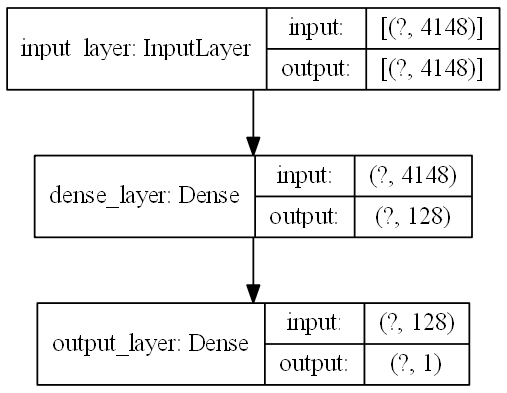

Train on 1593 samples, validate on 399 samples
Epoch 1/100
1593/1593 [==============================] - 1s 531us/sample - loss: 0.7441 - accuracy: 0.7470 - val_loss: 0.6009 - val_accuracy: 0.8170
Epoch 2/100
1593/1593 [==============================] - 0s 92us/sample - loss: 0.5802 - accuracy: 0.7753 - val_loss: 0.5272 - val_accuracy: 0.8170
Epoch 3/100
1593/1593 [==============================] - 0s 93us/sample - loss: 0.5298 - accuracy: 0.7753 - val_loss: 0.5020 - val_accuracy: 0.8170
Epoch 4/100
1593/1593 [==============================] - 0s 86us/sample - loss: 0.5076 - accuracy: 0.7753 - val_loss: 0.4919 - val_accuracy: 0.8170
Epoch 5/100
1593/1593 [==============================] - 0s 85us/sample - loss: 0.4937 - accuracy: 0.7753 - val_loss: 0.4962 - val_accuracy: 0.8170
Epoch 6/100
1593/1593 [==============================] - 0s 85us/sample - loss: 0.4829 - accuracy: 0.7753 - val_loss: 0.4918 - val_accuracy: 0.8170
Epoch 7/100
1593/1593 [==============================] - 0s 90us

In [27]:
# Fit model b2
model_b2 = model_B2(X_train)
# fit model_b2
history_b2, results_b2, acc_b2, val_acc_b2, loss_b2, val_loss_b2 = fit_model(model_b2, X_train, y_train, X_val, y_val, X_test, y_test, epo=100)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 4148)]            0         
_________________________________________________________________
dropout_layer_2 (Dropout)    (None, 4148)              0         
_________________________________________________________________
dense_layer (Dense)          (None, 128)               531072    
_________________________________________________________________
dropout_layer_4 (Dropout)    (None, 128)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 531,201
Trainable params: 531,201
Non-trainable params: 0
_________________________________________________________________


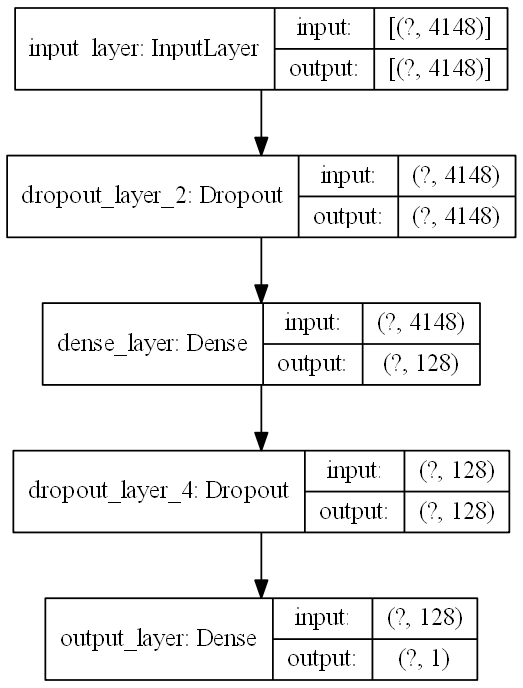

Train on 1593 samples, validate on 399 samples
Epoch 1/100
1593/1593 [==============================] - 1s 543us/sample - loss: 0.7465 - accuracy: 0.7527 - val_loss: 0.6123 - val_accuracy: 0.8170
Epoch 2/100
1593/1593 [==============================] - 0s 98us/sample - loss: 0.5961 - accuracy: 0.7753 - val_loss: 0.5350 - val_accuracy: 0.8170
Epoch 3/100
1593/1593 [==============================] - 0s 97us/sample - loss: 0.5503 - accuracy: 0.7753 - val_loss: 0.5043 - val_accuracy: 0.8170
Epoch 4/100
1593/1593 [==============================] - 0s 101us/sample - loss: 0.5301 - accuracy: 0.7753 - val_loss: 0.4912 - val_accuracy: 0.8170
Epoch 5/100
1593/1593 [==============================] - 0s 98us/sample - loss: 0.5195 - accuracy: 0.7753 - val_loss: 0.4901 - val_accuracy: 0.8170
Epoch 6/100
1593/1593 [==============================] - 0s 96us/sample - loss: 0.5145 - accuracy: 0.7753 - val_loss: 0.4855 - val_accuracy: 0.8170
Epoch 7/100
1593/1593 [==============================] - 0s 100

In [28]:
model_b3 = model_B3(X_train)
# fit model_b1
history_b3, results_b3, acc_b3, val_acc_b3, loss_b3, val_loss_b3 = fit_model(model_b3, X_train, y_train, X_val, y_val, X_test, y_test, epo=100)

<br>

<a id="6.5 Plot and Analysis"></a>
## 6.5 Plot and Analysis
<a href="#1.Summary">Click this Link back to Top</a>

<font size='5' color='red'>The best model from Task 1 is Model B with</font>

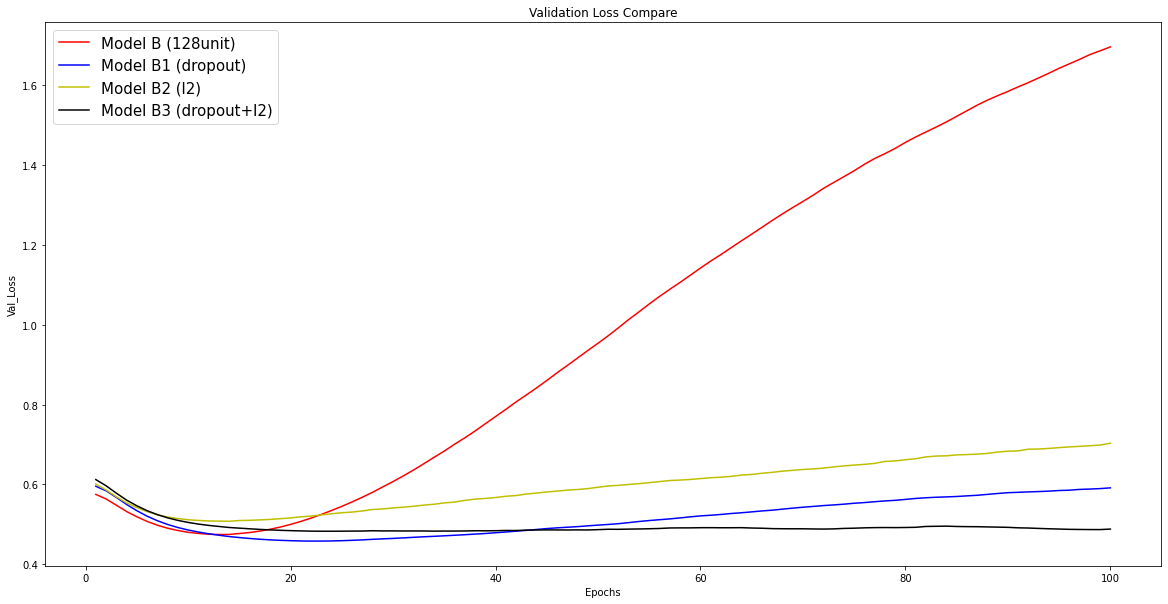

In [29]:
epochs = np.arange(1,101)
# plt.plot(epochs, val_loss_smooth)
fig, ax = plt.subplots(figsize=(20, 10))  # Create a figure and an axes.
ax.plot(epochs, smooth_curve(val_loss_b), label='Model B (128unit)',color='r')  # Plot some data on the axes.
ax.plot(epochs, smooth_curve(val_loss_b1), label='Model B1 (dropout)',color='b')  # Plot more data on the axes...
ax.plot(epochs, smooth_curve(val_loss_b2), label='Model B2 (l2)',color='y')  # ... and some more.
ax.plot(epochs, smooth_curve(val_loss_b3), label='Model B3 (dropout+l2)',color='k')  # ... and some more.
ax.set_xlabel('Epochs')  # Add an x-label to the axes.
ax.set_ylabel('Val_Loss')  # Add a y-label to the axes.
ax.set_title("Validation Loss Compare")  # Add a title to the axes.
ax.legend(prop={'size': 15})  # Add a legend.

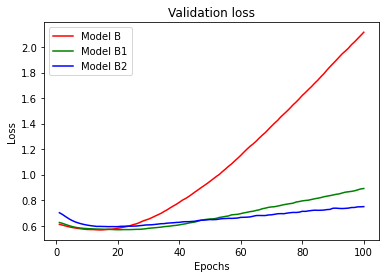

In [30]:
Image(filename='04_images/28.png') 

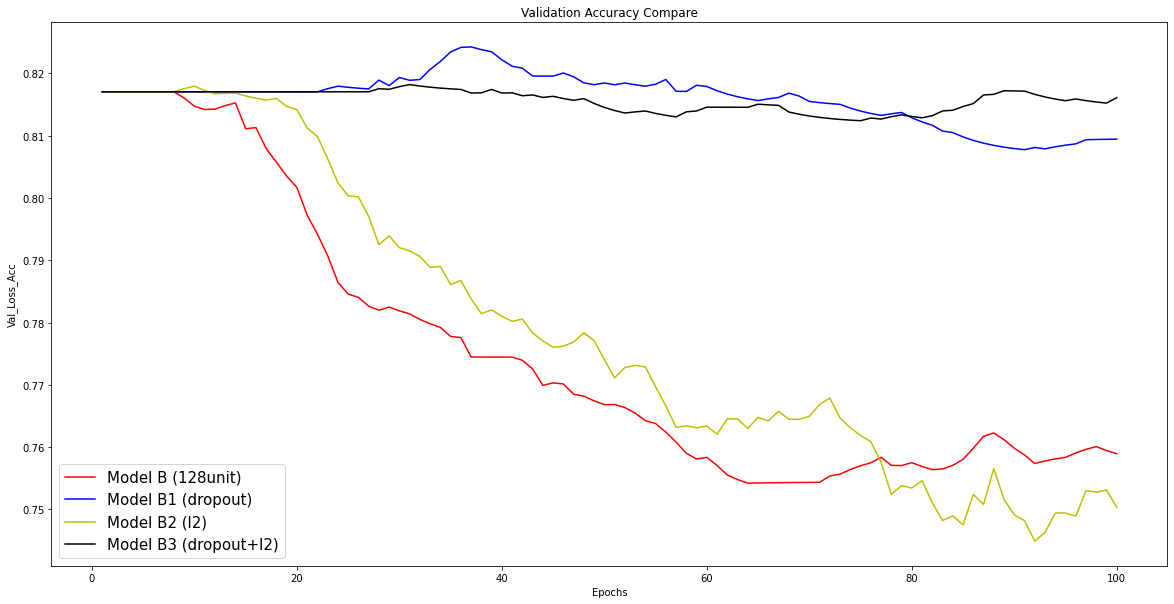

In [31]:
epochs = np.arange(1,101)
# plt.plot(epochs, val_loss_smooth)
fig, ax = plt.subplots(figsize=(20, 10))  # Create a figure and an axes.
ax.plot(epochs, smooth_curve(val_acc_b), label='Model B (128unit)',color='r')  # Plot some data on the axes.
ax.plot(epochs, smooth_curve(val_acc_b1), label='Model B1 (dropout)',color='b')  # Plot more data on the axes...
ax.plot(epochs, smooth_curve(val_acc_b2), label='Model B2 (l2)',color='y')  # ... and some more.
ax.plot(epochs, smooth_curve(val_acc_b3), label='Model B3 (dropout+l2)',color='k')  # ... and some more.
ax.set_xlabel('Epochs')  # Add an x-label to the axes.
ax.set_ylabel('Val_Loss_Acc')  # Add a y-label to the axes.
ax.set_title("Validation Accuracy Compare")  # Add a title to the axes.
ax.legend(prop={'size': 15})  # Add a legend.

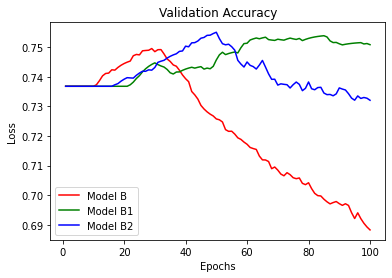

In [32]:
Image(filename='04_images/29.png') 

<br>

<br>

<a id="7.Task 4: NN for regression task"></a>
# 7.Task 4: NN for regression task
<a href="#1.Summary">Click this Link back to Top</a>

### Task 4: Create neural network model for regression task 
- In this task, let's create a model to predict specific `worry` level (`1-9`) using `text_short` column. Let's consider this as a `regression` task instead of classification, because it would be difficult to differenitate levels precisely (e.g. levels 4 and 5). We'd like to predict a level which can be close to the target level as much as possible.
- Let's reuse the best models you achieved for Task 1 and Task 2. Modify these models to for the regression task. Also, modify the `fit_model` function accordingly. Specifically, you need to modify:
  - Activation function of the output layer
  - Loss function 
- Similarly, split the samples to training, test, evaluation subsets as before. Note, for this task, the target is `worry` column in the dataset
- After training, use the model to predict <font color=red>'worry'</font> on the test subset and print out the test loss.
- Plot validation loss vs. epoches from the training histories of these models
- Did the regularization strategy improves model performance on the validation dataset? Write your analysis (as markdowns)
- `Note, due to randomness, you may observe different results in each round. You just need to analyze based on one round of the results you obtained`.

In [33]:
# According to former model select, we need use l2 and dropout simultaneouly.
def model_D(data):
    """
    use activation='lenear' and loss='mse' to get numerical result
    
    Argus:
    ------
    data:pandas.Serise
        Import will be a panda.Serise with index and column name. We only need its dimension to decide input neural unit
    
    Return:
    ------
    model:tensorflow.Model
        model only established without fit and compile      
    """
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    # row = number of examples
    # column = number of vector dimension (For TF-IDF algorithm, number of unique words is the word_dimension) 
    DIM = data.shape[1]
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    
    # clean model data
    model = None
    # input is not Dense layer, only a straight layer
    input_1 = layers.Input(shape=(DIM,), name="input_layer")
    # add Dropout layer between input and hidden layer
    dropout_2 = layers.Dropout(rate = 0.5, name='dropout_layer_2')(input_1)
    # only one layer hidden Dense layers with 256 units, which means output will be 256 dimension
    # paramter between input_1 and dense_2 will be (4148+1)*256 = 1062144. Plus 1 is bias term
    dense_3 = layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),activation='elu',name="dense_layer")(dropout_2)
    # add dropout layer
    dropout_4 = layers.Dropout(rate = 0.5,name="dropout_layer_4")(dense_3)
    # output activation can be 'linear' and also maybe just one unit Dense layer
    dense_5 = layers.Dense(1,activation='linear',name='output_layer')(dropout_4)
#     dense_5 = layers.Dense(1, name='output_layer')(dropout_4)
    model = Model(inputs=input_1, outputs=dense_5)
    model.summary()
    # Display model graph - optional
    G = model_to_dot (model)
    Image(G.create (prog = "dot", format = "png"))
    #
    display(plot_model(model, show_shapes=True, dpi=128))
    
    return model

In [34]:
# Define Model E

# add your code here
def model_E(data):
    """
    Two hidden layer, frist is 128 units, second is 32 units
    
    Argus:
    ------
    data:pandas.Serise
        Import will be a panda.Serise with index and column name
    
    Return:
    ------
    model:
    
    """
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    # row = number of examples
    # column = number of vector dimension (For TF-IDF algorithm, number of unique words is the word_dimension) 
    DIM = data.shape[1]
    #***************hyperparameters(should be integrate into self.DIM in Class)****************************
    
    # clean model data
    model=None
    # input is not Dense layer, only a straight layer
    input_1 = layers.Input(shape=(DIM,), name="input_layer")
    # only one layer hidden Dense layers with 256 units, which means output will be 256 dimension
    # paramter between input_1 and dense_2 will be (4148+1)*256 = 1062144. Plus 1 is bias term
    dense_2 = layers.Dense(128, activation='relu',name="first_hidden_layer")(input_1)
    # 
    dense_3 = layers.Dense(32, activation='relu', name='second_hidden_layer')(dense_2)
    dense_4 = layers.Dense(1, activation='linear', name='output_layer')(dense_3)
    model = Model(inputs=input_1, outputs=dense_4)
    model.summary()
    # Display model graph - optional
    G = model_to_dot (model)
    Image(G.create (prog = "dot", format = "png"))
    #
    display(plot_model(model, show_shapes=True, dpi=128))
    
    return model

In [42]:
# Define fit_model function 
def fit_model_reg(model, X_train, y_train, X_val, y_val, X_test, y_test, epo=10, loss_fun="binary_crossentropy", met=['accuracy']):
    """
    Argus:
    ------
    
    loss_fun:string
        default "binary_crossentropy" used for classify. "mse" or "mae" for linear regresion
        
    met:list
        parameter for metrices im model.compile()
    
    Returns:
    --------
    """    
    history = None
    
    # add your code here
    # please print out the performance on test subset
    # loss_function will be binary_crossentropy for sigmoid binary classifier problem
    # default learning rate optimzer is "RMSprop" is better
    # metrics have another options "BinaryAccuracy"
    model.compile(loss=loss_fun, \
              optimizer="RMSprop", \
              metrics=met)
    
    # history contain a dictionary ['loss', 'accuracy', 'val_loss', 'val_accuracy']
    history = model.fit(X_train,
                    y_train,
                    epochs=epo,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    verbose=1)
    # results.loss and results.accuracy
    # because X_test only have 499 example, so we reduce batch_size from 128 to 32
    results = model.evaluate(X_test,  y_test, batch_size=32, verbose=1)
    # create Dataframe of results
    results_dict={}
    for i in range(len(results)):
        results_dict[model.metrics_names[i]] = results[i]
    # get the dictionary of history
    # put the result into DataFrame, and we can access specifty column by column nam
    history_df = pd.DataFrame(history.history)
    # add epoch info with each result
    history_df['epoch'] = history.epoch
    print(f"History contain these attributes {history_df.columns}")
#     history_dict = history.history
#     acc = history_dict['accuracy']
#     val_acc = history_dict['val_accuracy']
#     loss = history_dict['loss']
#     val_loss = history_dict['val_loss']
    
    
    return history, results_dict, history_df

In [43]:
# split data into training, evaluation, and test subsets

from sklearn.model_selection import train_test_split

def split_reg(df_data, df_tfidf_vect):
    """
    The easiest way is split twice and get train/validation/test dataset
    """
    # First, split 80% train and 20% test
    # input data should be a m*n matrix, m is the number of example, n is the number of word dimension
    X_train, X_test, y_train, y_test = train_test_split(df_tfidf_vect.iloc[:,:-1], \
                                                         df_data['worry'], test_size=0.2, random_state=42)
    # Second, split 80% train and 20% validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [44]:
X_train, X_val, X_test, y_train, y_val, y_test = split_reg(df_data, df_tfidf_vect)

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 4148)]            0         
_________________________________________________________________
dropout_layer_2 (Dropout)    (None, 4148)              0         
_________________________________________________________________
dense_layer (Dense)          (None, 128)               531072    
_________________________________________________________________
dropout_layer_4 (Dropout)    (None, 128)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 531,201
Trainable params: 531,201
Non-trainable params: 0
_________________________________________________________________


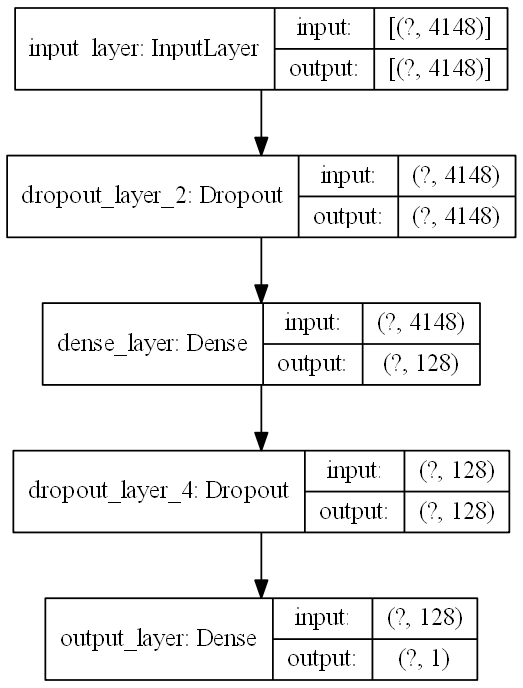

Train on 1593 samples, validate on 399 samples
Epoch 1/100
1593/1593 [==============================] - 1s 678us/sample - loss: 40.9573 - mae: 6.1366 - mse: 40.8296 - accuracy: 6.2775e-04 - val_loss: 38.2384 - val_mae: 5.9318 - val_mse: 38.1636 - val_accuracy: 0.0100
Epoch 2/100
1593/1593 [==============================] - 0s 110us/sample - loss: 32.8218 - mae: 5.4355 - mse: 32.7532 - accuracy: 0.0056 - val_loss: 30.8163 - val_mae: 5.2799 - val_mse: 30.7491 - val_accuracy: 0.0100
Epoch 3/100
1593/1593 [==============================] - 0s 106us/sample - loss: 25.8431 - mae: 4.7515 - mse: 25.7713 - accuracy: 0.0063 - val_loss: 23.9865 - val_mae: 4.6041 - val_mse: 23.9075 - val_accuracy: 0.0100
Epoch 4/100
1593/1593 [==============================] - 0s 122us/sample - loss: 19.6038 - mae: 4.0469 - mse: 19.5174 - accuracy: 0.0063 - val_loss: 17.8889 - val_mae: 3.9066 - val_mse: 17.7927 - val_accuracy: 0.0100
Epoch 5/100
1593/1593 [==============================] - 0s 114us/sample - loss: 

In [45]:
model_d = model_D(X_train)
# fit model_b1
history_d, result_d, history_df_d = \
fit_model_reg(model_d, X_train, y_train, X_val, y_val, X_test, y_test, epo=100, loss_fun='mse', met=['mae','mse','accuracy'])

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 4148)]            0         
_________________________________________________________________
first_hidden_layer (Dense)   (None, 128)               531072    
_________________________________________________________________
second_hidden_layer (Dense)  (None, 32)                4128      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 535,233
Trainable params: 535,233
Non-trainable params: 0
_________________________________________________________________


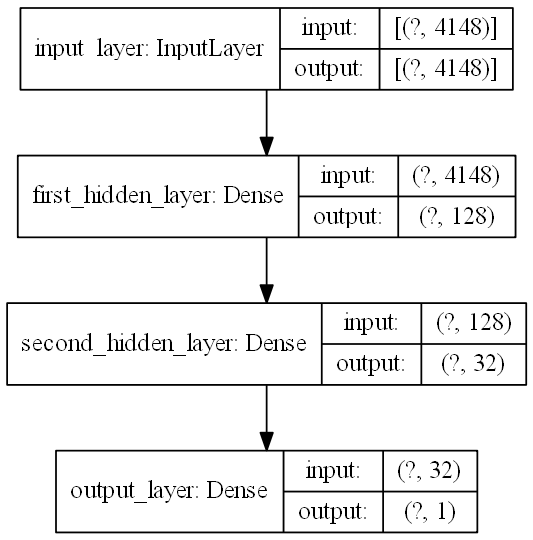

Train on 1593 samples, validate on 399 samples
Epoch 1/100
1593/1593 [==============================] - 1s 685us/sample - loss: 39.4470 - mae: 6.0194 - mse: 39.4470 - accuracy: 0.0025 - val_loss: 33.0741 - val_mae: 5.4915 - val_mse: 33.0741 - val_accuracy: 0.0100
Epoch 2/100
1593/1593 [==============================] - 0s 108us/sample - loss: 24.0356 - mae: 4.5620 - mse: 24.0356 - accuracy: 0.0063 - val_loss: 17.4391 - val_mae: 3.8597 - val_mse: 17.4391 - val_accuracy: 0.0100
Epoch 3/100
1593/1593 [==============================] - 0s 105us/sample - loss: 10.6766 - mae: 2.8700 - mse: 10.6766 - accuracy: 0.0063 - val_loss: 7.2620 - val_mae: 2.3356 - val_mse: 7.2620 - val_accuracy: 0.0100
Epoch 4/100
1593/1593 [==============================] - 0s 100us/sample - loss: 4.7182 - mae: 1.7866 - mse: 4.7182 - accuracy: 0.0063 - val_loss: 4.5366 - val_mae: 1.7408 - val_mse: 4.5366 - val_accuracy: 0.0100
Epoch 5/100
1593/1593 [==============================] - 0s 92us/sample - loss: 3.5410 - ma

In [46]:
# model_E is the compy of model_C from Task1
model_e = model_E(X_train)
# fit model_e
history_e, result_e, history_df_e = \
fit_model_reg(model_e, X_train, y_train, X_val, y_val, X_test, y_test, epo=100, loss_fun='mse', met=['mae','mse','accuracy'])

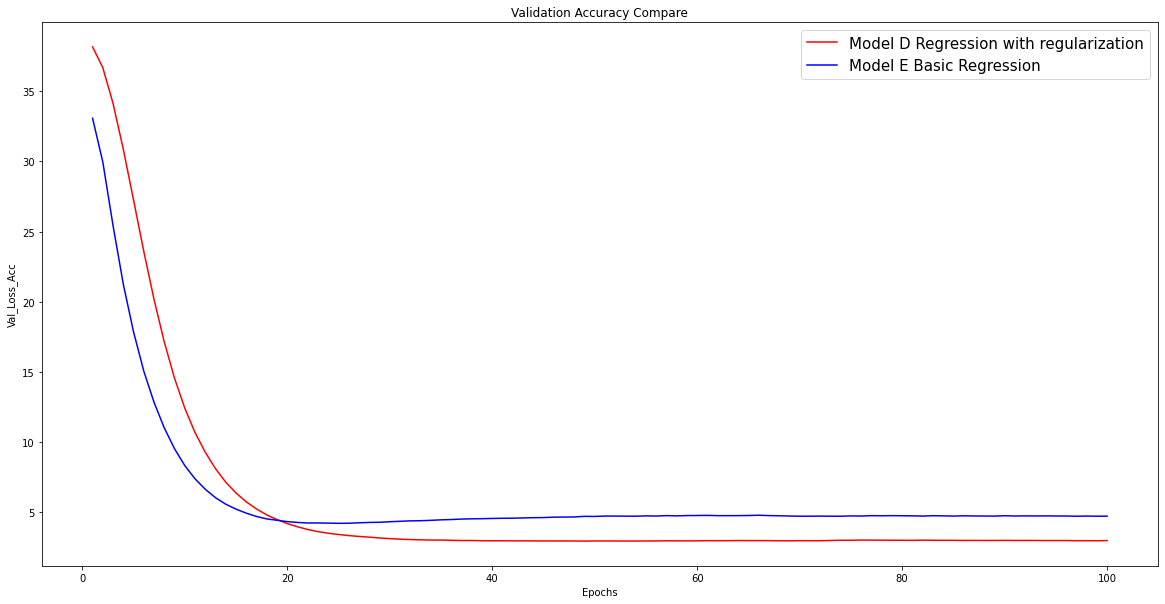

In [47]:
epochs = np.arange(1,101)
# plt.plot(epochs, val_loss_smooth)
fig, ax = plt.subplots(figsize=(20, 10))  # Create a figure and an axes.
ax.plot(epochs, smooth_curve(history_df_d['val_mse']), label='Model D Regression with regularization',color='r') 
ax.plot(epochs, smooth_curve(history_df_e['val_mse']), label='Model E Basic Regression',color='b')  # Plot more data on the axes...
# ax.plot(epochs, smooth_curve(val_acc_b2), label='Model B2 (l2)',color='y')  # ... and some more.
# ax.plot(epochs, smooth_curve(val_acc_b3), label='Model B3 (dropout+l2)',color='k')  # ... and some more.
ax.set_xlabel('Epochs')  # Add an x-label to the axes.
ax.set_ylabel('Val_Loss_Acc')  # Add a y-label to the axes.
ax.set_title("Validation Accuracy Compare")  # Add a title to the axes.
ax.legend(prop={'size': 15})  # Add a legend.

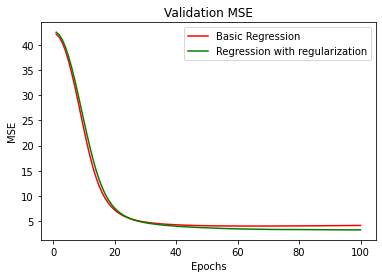

In [48]:
# Plot evaluation performance of two models

# add your code here
Image(filename='04_images/30.png') 

### predict

In [50]:
result_d

{'loss': 3.0292988898520004,
 'mae': 1.3579662,
 'mse': 2.9501982,
 'accuracy': 0.004008016}

In [51]:
history_df_d

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
0,40.957337,6.136631,40.829563,0.000628,38.238423,5.931753,38.163631,0.010025,0
1,32.821803,5.435460,32.753223,0.005650,30.816342,5.279879,30.749142,0.010025,1
2,25.843052,4.751485,25.771332,0.006277,23.986478,4.604128,23.907537,0.010025,2
3,19.603794,4.046934,19.517433,0.006277,17.888880,3.906601,17.792694,0.010025,3
4,14.161650,3.346352,14.057156,0.006277,12.879744,3.241292,12.765043,0.010025,4
...,...,...,...,...,...,...,...,...,...
95,2.430469,1.186324,2.349999,0.006277,3.052987,1.354414,2.973020,0.010025,95
96,2.247895,1.144110,2.167775,0.006277,2.992696,1.311967,2.912841,0.010025,96
97,2.316641,1.168208,2.236860,0.006277,3.038874,1.347526,2.959331,0.010025,97
98,2.283671,1.161192,2.204138,0.006277,3.012638,1.333160,2.933233,0.010025,98


For model_D, test Loss is 3.0292988898520004

For model_D, test accuracy is 0.004008016083389521



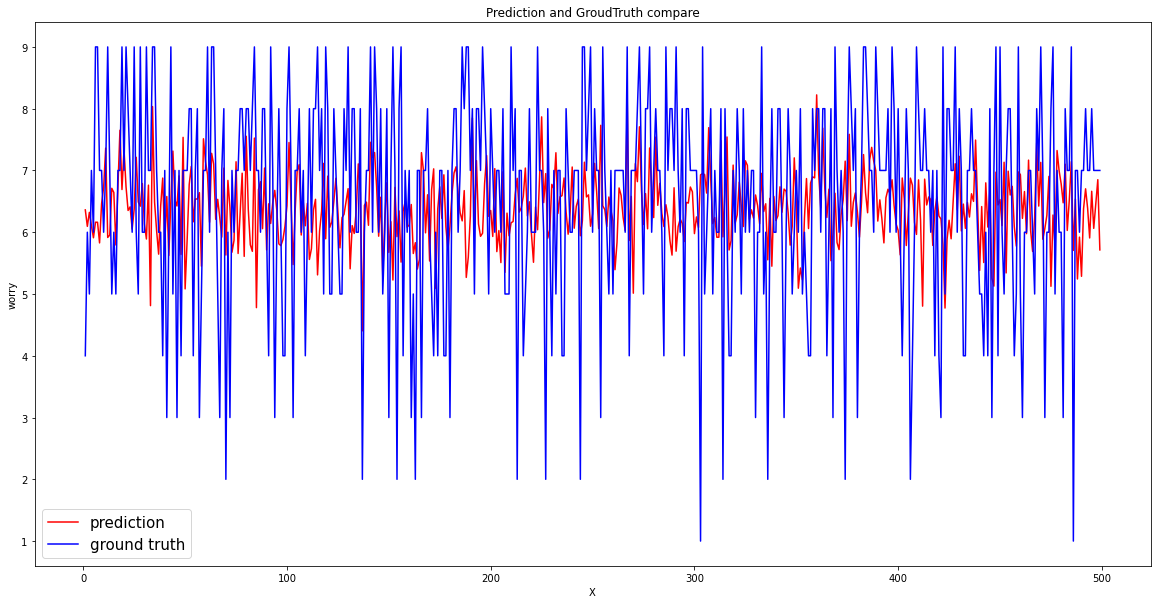

In [49]:
print(f"For model_D, test Loss is {result_d['loss']}\n")
print(f"For model_D, test accuracy is {result_d['accuracy']}\n")
epochs = np.arange(1,500)
# plt.plot(epochs, val_loss_smooth)
fig, ax = plt.subplots(figsize=(20, 10))  # Create a figure and an axes.
ax.plot(epochs, model_d.predict(X_test), label='prediction',color='r') 
ax.plot(epochs, y_test, label='ground truth',color='b')  # Plot more data on the axes...
# ax.plot(epochs, smooth_curve(val_acc_b2), label='Model B2 (l2)',color='y')  # ... and some more.
# ax.plot(epochs, smooth_curve(val_acc_b3), label='Model B3 (dropout+l2)',color='k')  # ... and some more.
ax.set_xlabel('X')  # Add an x-label to the axes.
ax.set_ylabel('worry')  # Add a y-label to the axes.
ax.set_title("Prediction and GroudTruth compare")  # Add a title to the axes.
ax.legend(prop={'size': 15})  # Add a legend.

In [ ]:
print(f"For model_E, test loss is {result_e['loss']}\n")
epochs = np.arange(1,500)
# plt.plot(epochs, val_loss_smooth)
fig, ax = plt.subplots(figsize=(20, 10))  # Create a figure and an axes.
ax.plot(epochs, model_e.predict(X_test), label='prediction',color='r') 
ax.plot(epochs, y_test, label='ground truth',color='b')  # Plot more data on the axes...
# ax.plot(epochs, smooth_curve(val_acc_b2), label='Model B2 (l2)',color='y')  # ... and some more.
# ax.plot(epochs, smooth_curve(val_acc_b3), label='Model B3 (dropout+l2)',color='k')  # ... and some more.
ax.set_xlabel('X')  # Add an x-label to the axes.
ax.set_ylabel('worry')  # Add a y-label to the axes.
ax.set_title("Prediction and GroudTruth compare")  # Add a title to the axes.
ax.legend(prop={'size': 15})  # Add a legend.

<a id="8.Task 5: NN for multi-classification task"></a>
# 8.Task 5: NN for multi-classification task
<a href="#1.Summary">Click this Link back to Top</a>

<a id="9.Hyperparameter Explain"></a>
# 9.Hyperparameter Explain
<a href="#1.Summary">Click this Link back to Top</a>

elu>relu

In [ ]:
l2 regulaziation

less layer is better

dropout rate

<a id="10.Unused Code"></a>
# 10.Unused Code
<a href="#1.Summary">Click this Link back to Top</a>

In [ ]:
df = read_df()

df.head(3)

df.shape

df.iloc[0,12]